## Predicting Whether a Person Will Have Diabetes or Not

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler

In [58]:
df = pd.read_csv("/content/diabetes.csv")

In [59]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [60]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [12]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [13]:
col_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in col_with_zero:
  df[col] = df[col].replace(0, np.NaN)
  mean = int(df[col].mean(skipna=True))
  df[col] = df[col].replace(np.NaN, mean)

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


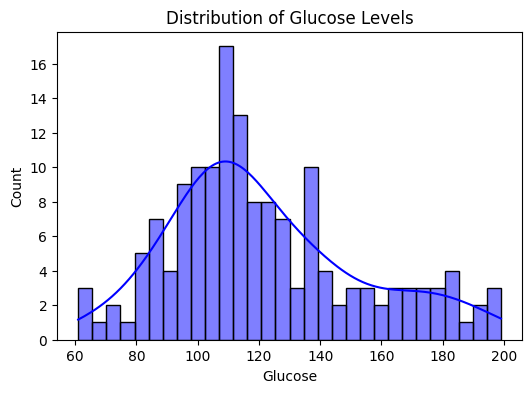

In [55]:
# 1. Histogram
plt.figure(figsize=(6,4))
sns.histplot(df['Glucose'], kde=True, bins=30, color='blue')
plt.title('Distribution of Glucose Levels')
plt.show()

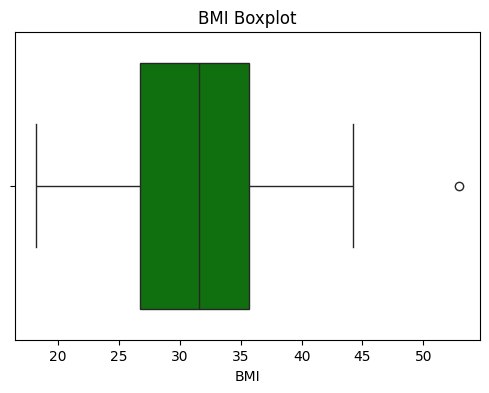

In [56]:
# 2. Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df['BMI'], color='green')
plt.title('BMI Boxplot')
plt.show()

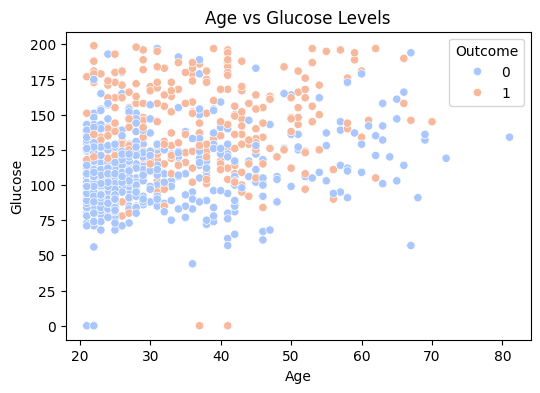

In [61]:
# 3. Scatter Plot
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Age'], y=df['Glucose'], hue=df['Outcome'], palette='coolwarm')
plt.title('Age vs Glucose Levels')
plt.show()

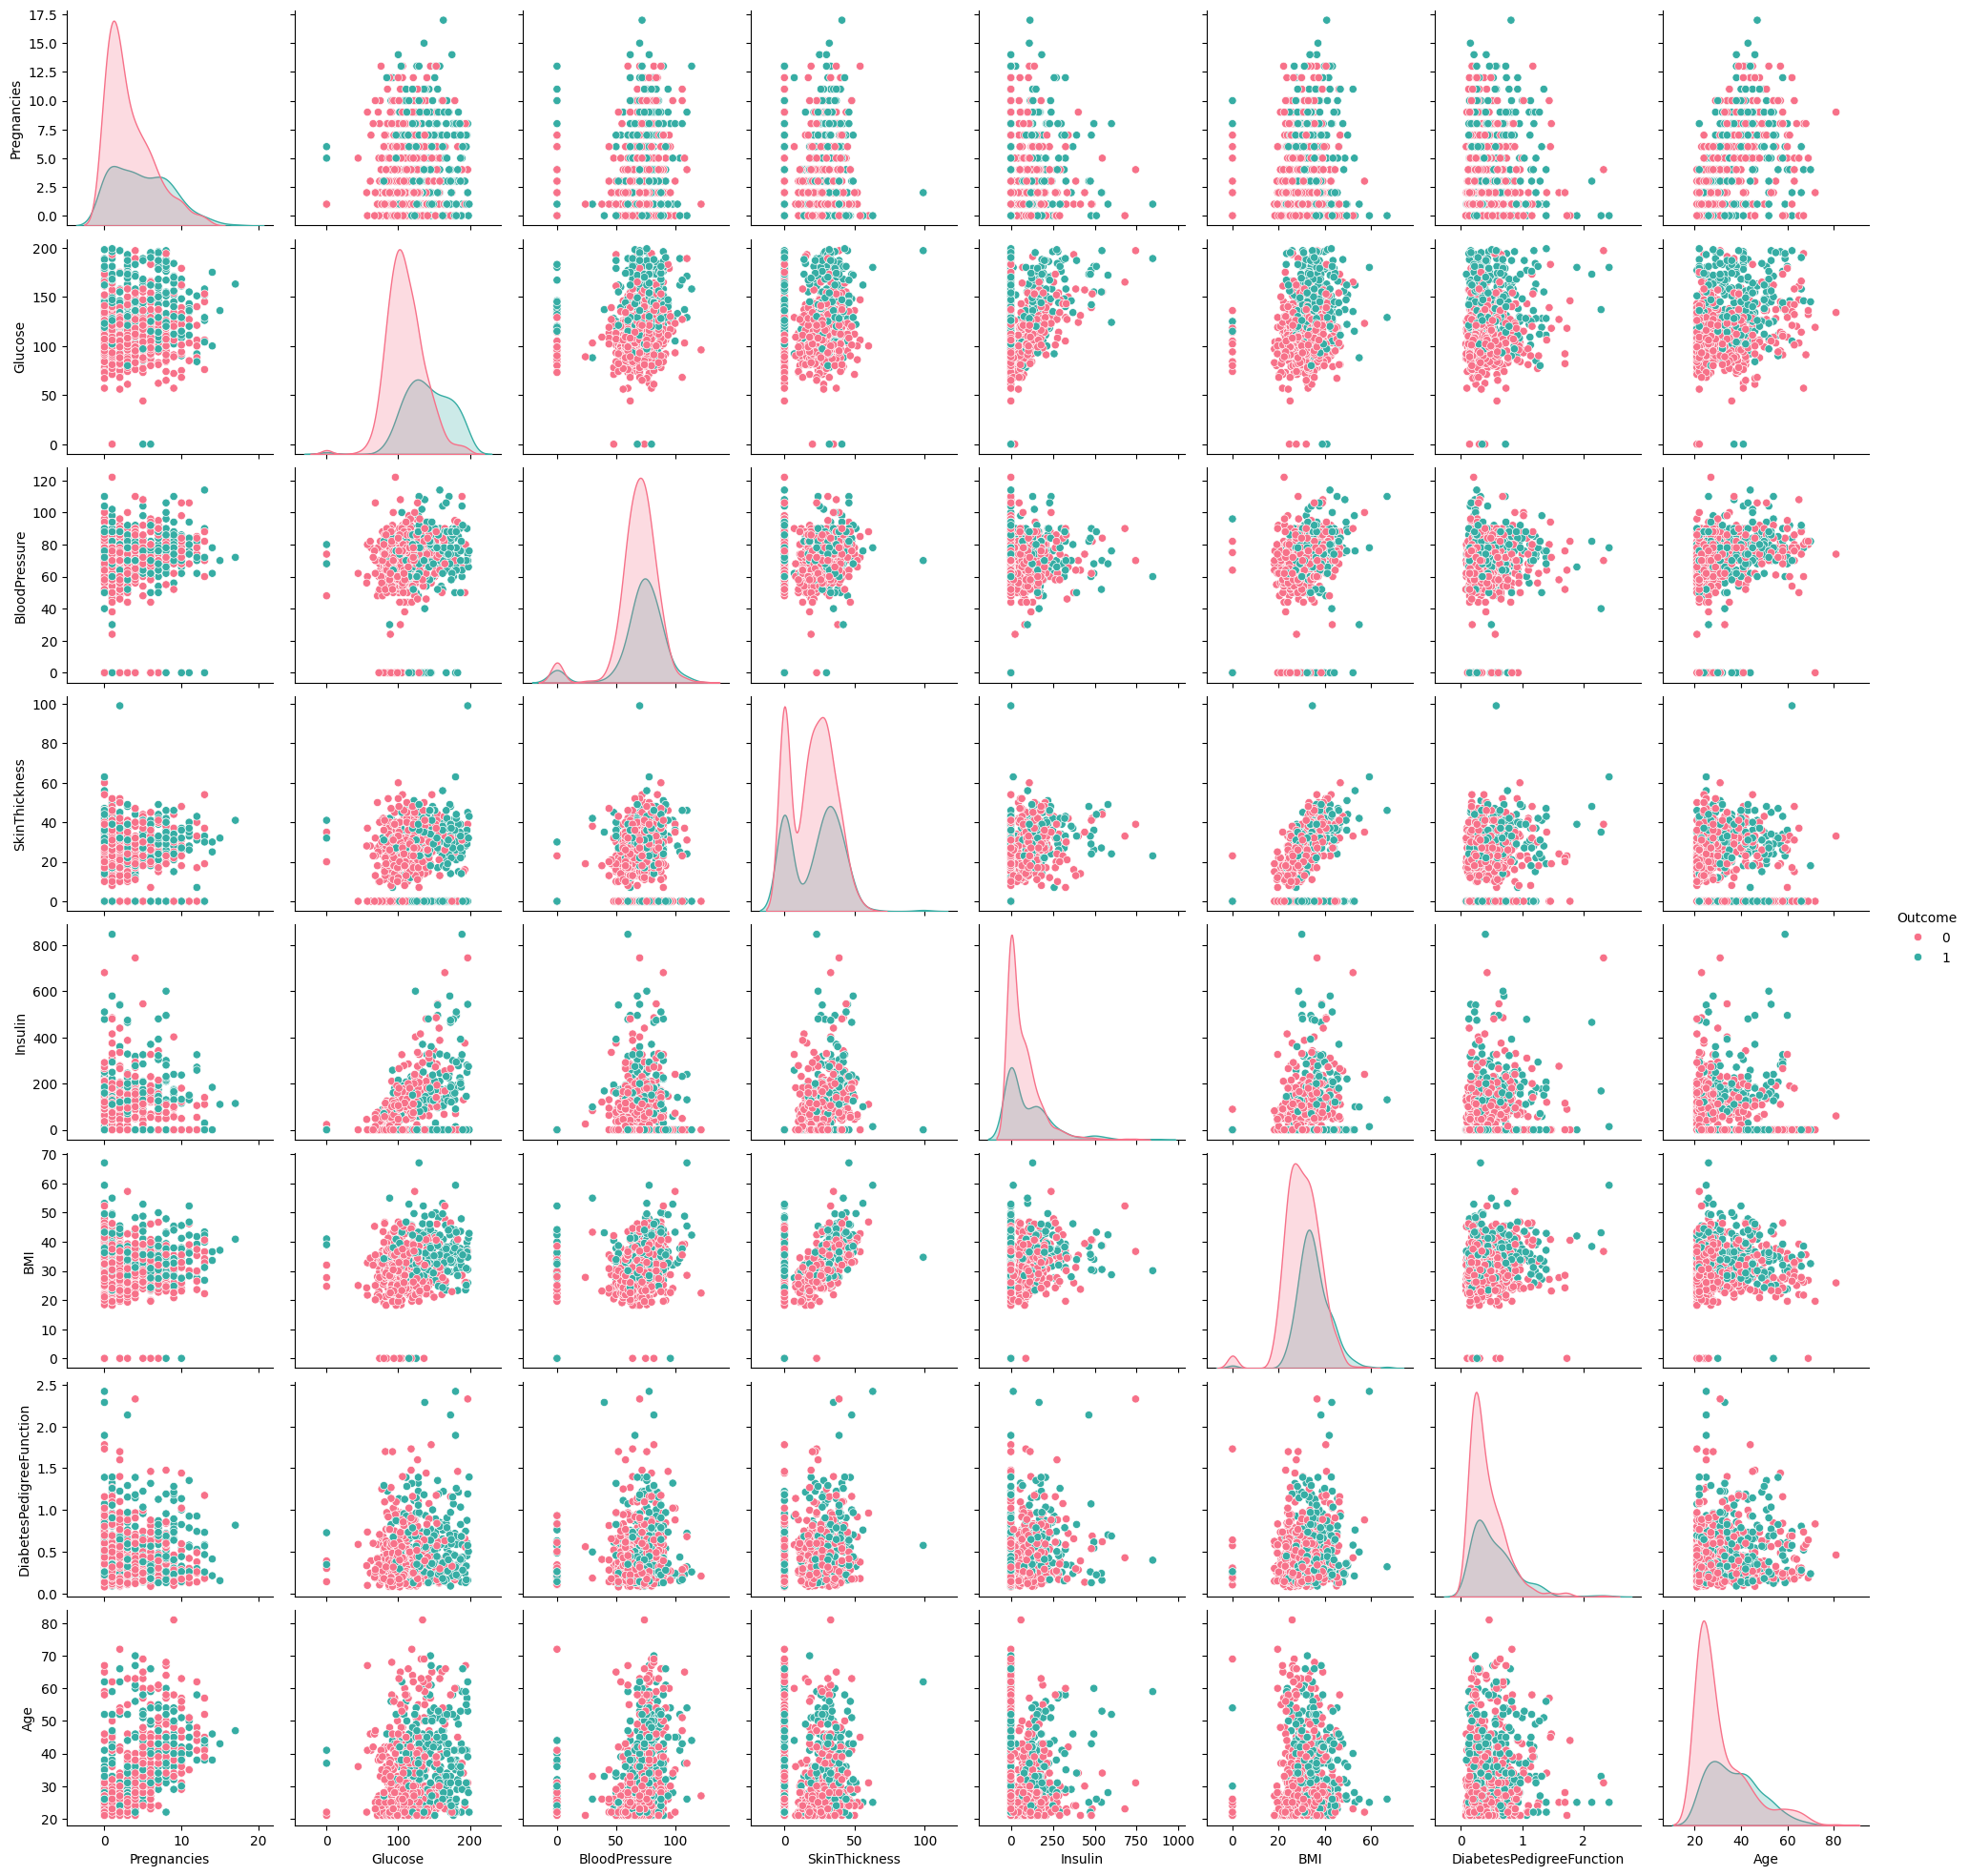

In [62]:
# 4. Pairplot
sns.pairplot(df, hue='Outcome', diag_kind='kde', palette='husl')
plt.show()

<Axes: >

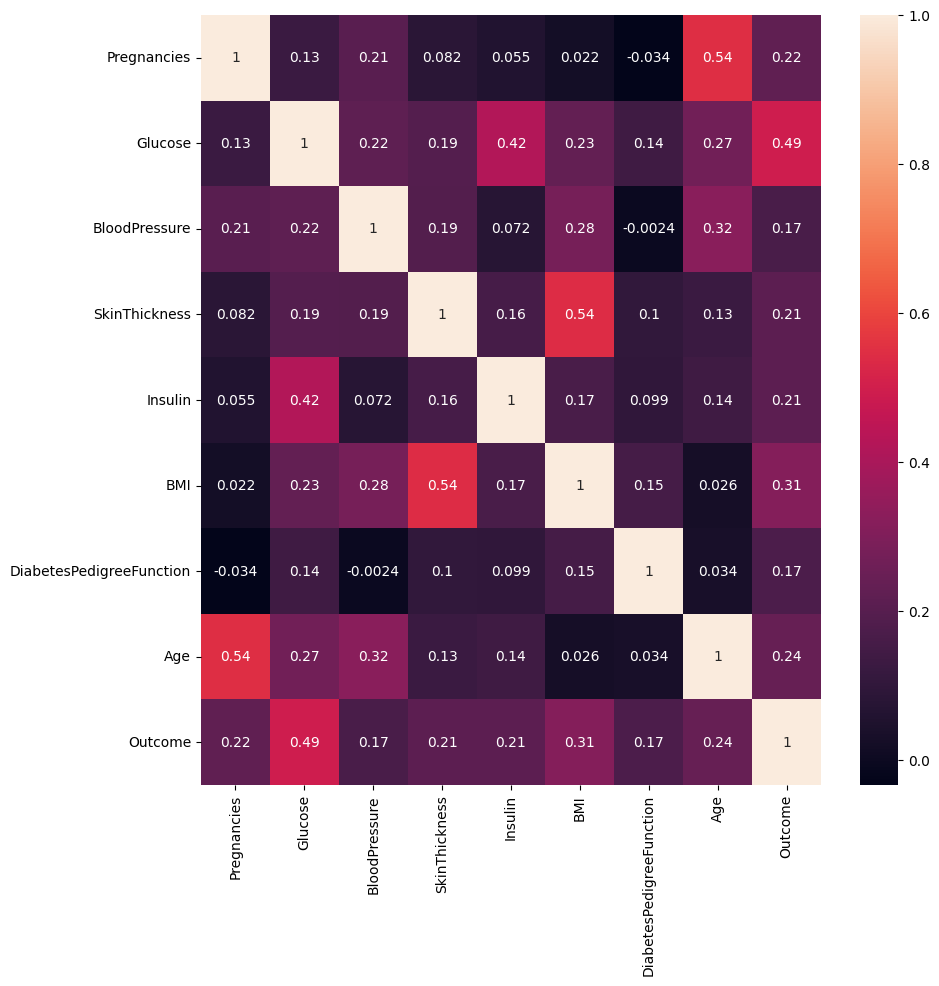

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [19]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

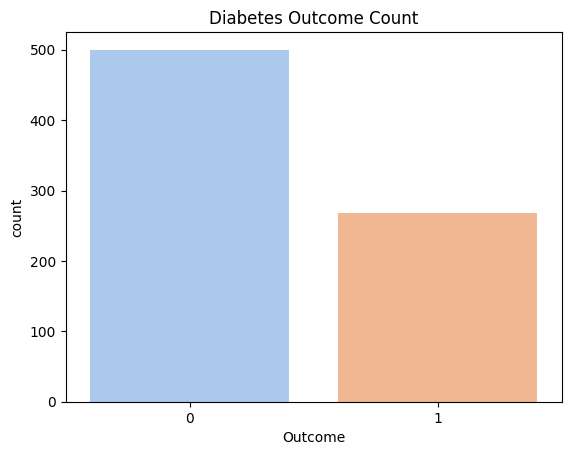

In [63]:
# 6. Countplot (Outcome distribution)
sns.countplot(x=df['Outcome'], palette='pastel')
plt.title('Diabetes Outcome Count')
plt.show()

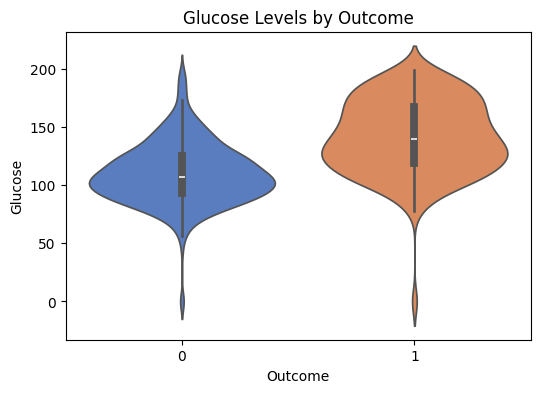

In [64]:
# 7. Violin Plot
plt.figure(figsize=(6,4))
sns.violinplot(x=df['Outcome'], y=df['Glucose'], palette='muted')
plt.title('Glucose Levels by Outcome')
plt.show()

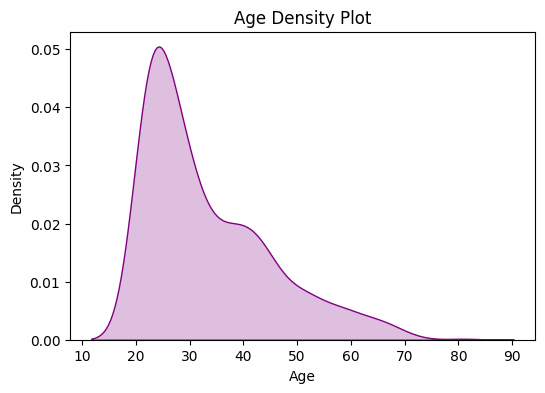

In [65]:
# 8. KDE Plot
plt.figure(figsize=(6,4))
sns.kdeplot(df['Age'], shade=True, color='purple')
plt.title('Age Density Plot')
plt.show()

In [28]:
X = df.drop(columns="Outcome")
y = df["Outcome"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
X_train.shape

(614, 8)

In [31]:
X_test.shape

(154, 8)

In [32]:
y_train.shape

(614,)

In [33]:
y_test.shape

(154,)

In [40]:
scaler = StandardScaler()
_X_train = scaler.fit_transform(X_train)
_X_test = scaler.transform(X_test)

In [37]:
_X_train

array([[ 0.90832902,  0.93641795,  0.44764174, ...,  0.36863635,
         0.67740401,  1.69955804],
       [ 0.03644676, -0.81630913, -1.05200558, ..., -0.63294341,
        -0.07049698, -0.96569189],
       [-1.12606292,  1.43247278,  1.44740662, ...,  2.81535261,
        -0.11855487, -0.88240283],
       ...,
       [ 0.03644676, -0.91552009, -0.63543688, ..., -1.13373329,
        -0.95656442, -1.04898095],
       [ 2.0708387 , -1.21315299,  0.11438678, ..., -0.36108605,
        -0.50001442,  0.11706589],
       [ 0.32707418,  0.47343344,  0.7808967 , ..., -0.08922869,
         0.52121586,  2.94889395]])

In [38]:
_X_test

array([[-0.8354355 ,  2.55686374,  0.28101426, ...,  1.47037408,
         2.78594417, -0.96569189],
       [-0.54480808, -0.4856059 ,  0.11438678, ...,  0.13970383,
        -0.1876381 , -0.88240283],
       [ 0.03644676, -1.51078589, -0.8853781 , ...,  0.19693696,
        -0.22668514, -0.71582471],
       ...,
       [ 0.03644676,  0.67185537,  1.11415166, ...,  1.62776519,
         0.53623395, -0.96569189],
       [-0.25418066, -0.187973  ,  0.11438678, ..., -0.90480077,
        -1.07971278, -0.79911377],
       [-0.8354355 , -0.4856059 , -0.0522407 , ..., -0.26092807,
         1.06487079, -0.79911377]])

In [41]:
model = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')

In [43]:
model.fit(_X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [44]:
y_pred = model.predict(_X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[94, 13],
       [15, 32]])

In [46]:
print(f"The f1_score is: {f1_score(y_test, y_pred)}")

The f1_score is: 0.6956521739130435


In [47]:
print(f"The accuracy score is: {accuracy_score(y_test, y_pred)}")

The accuracy score is: 0.8181818181818182
